Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

Loading Dataset

In [3]:
d = pd.read_csv(r'/content/WeatherJena.csv')
d

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),...,wv (m/s),max. wv (m/s),wd (deg),rain (mm),raining (s),SWDR (W/m�),PAR (�mol/m�/s),max. PAR (�mol/m�/s),Tlog (degC),CO2 (ppm)
0,01.01.2010 00:10:00,967.56,-2.84,272.89,-3.41,95.8,4.95,4.75,0.21,3.06,...,1.61,2.76,15.41,0.0,0.0,0.00,0.00,0.00,8.59,404.6
1,01.01.2010 00:20:00,967.45,-2.85,272.88,-3.43,95.7,4.95,4.74,0.21,3.05,...,2.00,3.10,17.04,0.0,0.0,0.00,0.00,0.00,8.53,404.1
2,01.01.2010 00:30:00,967.45,-2.88,272.85,-3.46,95.8,4.94,4.73,0.21,3.05,...,2.25,3.79,25.35,0.0,0.0,0.00,0.00,0.00,8.52,404.3
3,01.01.2010 00:40:00,967.34,-2.90,272.84,-3.47,95.8,4.93,4.72,0.21,3.04,...,2.64,3.77,23.64,0.0,270.0,0.00,0.00,0.00,8.54,404.0
4,01.01.2010 00:50:00,967.29,-2.96,272.78,-3.53,95.8,4.91,4.70,0.21,3.03,...,2.82,4.29,18.94,0.0,310.0,0.00,0.00,0.00,8.55,401.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178026,20.05.2013 07:20:00,982.34,11.05,285.66,7.16,76.9,13.19,10.14,3.05,6.45,...,4.69,7.97,207.70,0.0,0.0,174.45,344.02,416.99,20.60,396.6
178027,20.05.2013 07:30:00,982.53,11.33,285.93,7.22,75.8,13.43,10.18,3.25,6.47,...,4.79,6.91,212.70,0.0,0.0,329.78,627.03,999.23,20.68,396.2
178028,20.05.2013 07:40:00,982.58,11.49,286.08,7.22,75.0,13.58,10.18,3.39,6.47,...,5.30,8.65,213.40,0.0,0.0,209.46,410.04,587.64,20.76,396.1
178029,20.05.2013 07:50:00,982.61,11.44,286.03,7.37,76.0,13.53,10.29,3.25,6.54,...,4.65,7.81,209.10,0.0,0.0,151.51,299.61,315.25,20.86,396.7


Removing null columns

In [4]:
d=d[['Date Time','p (mbar)','T (degC)','Tpot (K)','Tdew (degC)','rh (%)','VPmax (mbar)','VPact (mbar)','VPdef (mbar)','sh (g/kg)','H2OC (mmol/mol)','rho (g/m**3)','wv (m/s)', 'max. wv (m/s)','wd (deg)','rain (mm)',
'CO2 (ppm)']]  
d

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg),rain (mm),CO2 (ppm)
0,01.01.2010 00:10:00,967.56,-2.84,272.89,-3.41,95.8,4.95,4.75,0.21,3.06,4.91,1244.56,1.61,2.76,15.41,0.0,404.6
1,01.01.2010 00:20:00,967.45,-2.85,272.88,-3.43,95.7,4.95,4.74,0.21,3.05,4.90,1244.48,2.00,3.10,17.04,0.0,404.1
2,01.01.2010 00:30:00,967.45,-2.88,272.85,-3.46,95.8,4.94,4.73,0.21,3.05,4.89,1244.65,2.25,3.79,25.35,0.0,404.3
3,01.01.2010 00:40:00,967.34,-2.90,272.84,-3.47,95.8,4.93,4.72,0.21,3.04,4.88,1244.57,2.64,3.77,23.64,0.0,404.0
4,01.01.2010 00:50:00,967.29,-2.96,272.78,-3.53,95.8,4.91,4.70,0.21,3.03,4.86,1244.81,2.82,4.29,18.94,0.0,401.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178026,20.05.2013 07:20:00,982.34,11.05,285.66,7.16,76.9,13.19,10.14,3.05,6.45,10.32,1199.37,4.69,7.97,207.70,0.0,396.6
178027,20.05.2013 07:30:00,982.53,11.33,285.93,7.22,75.8,13.43,10.18,3.25,6.47,10.36,1198.40,4.79,6.91,212.70,0.0,396.2
178028,20.05.2013 07:40:00,982.58,11.49,286.08,7.22,75.0,13.58,10.18,3.39,6.47,10.36,1197.79,5.30,8.65,213.40,0.0,396.1
178029,20.05.2013 07:50:00,982.61,11.44,286.03,7.37,76.0,13.53,10.29,3.25,6.54,10.47,1197.99,4.65,7.81,209.10,0.0,396.7


Data Analysis

In [5]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178031 entries, 0 to 178030
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Date Time        178031 non-null  object 
 1   p (mbar)         178031 non-null  float64
 2   T (degC)         178031 non-null  float64
 3   Tpot (K)         178031 non-null  float64
 4   Tdew (degC)      178031 non-null  float64
 5   rh (%)           178031 non-null  float64
 6   VPmax (mbar)     178031 non-null  float64
 7   VPact (mbar)     178031 non-null  float64
 8   VPdef (mbar)     178031 non-null  float64
 9   sh (g/kg)        178031 non-null  float64
 10  H2OC (mmol/mol)  178031 non-null  float64
 11  rho (g/m**3)     178031 non-null  float64
 12  wv (m/s)         178030 non-null  float64
 13  max. wv (m/s)    178030 non-null  float64
 14  wd (deg)         178030 non-null  float64
 15  rain (mm)        178030 non-null  float64
 16  CO2 (ppm)        178030 non-null  floa

Changing Date column datatype to datetime

In [6]:
d['Date Time']= pd.to_datetime(d['Date Time'])

<ipython-input-6-c8d0388f79a3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['Date Time']= pd.to_datetime(d['Date Time'])


In [7]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178031 entries, 0 to 178030
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Date Time        178031 non-null  datetime64[ns]
 1   p (mbar)         178031 non-null  float64       
 2   T (degC)         178031 non-null  float64       
 3   Tpot (K)         178031 non-null  float64       
 4   Tdew (degC)      178031 non-null  float64       
 5   rh (%)           178031 non-null  float64       
 6   VPmax (mbar)     178031 non-null  float64       
 7   VPact (mbar)     178031 non-null  float64       
 8   VPdef (mbar)     178031 non-null  float64       
 9   sh (g/kg)        178031 non-null  float64       
 10  H2OC (mmol/mol)  178031 non-null  float64       
 11  rho (g/m**3)     178031 non-null  float64       
 12  wv (m/s)         178030 non-null  float64       
 13  max. wv (m/s)    178030 non-null  float64       
 14  wd (deg)         178

In [8]:
# Sorting by the date 
d.sort_values('Date Time', inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [9]:
d

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg),rain (mm),CO2 (ppm)
0,2010-01-01 00:10:00,967.56,-2.84,272.89,-3.41,95.8,4.95,4.75,0.21,3.06,4.91,1244.56,1.61,2.76,15.41,0.0,404.6
1,2010-01-01 00:20:00,967.45,-2.85,272.88,-3.43,95.7,4.95,4.74,0.21,3.05,4.90,1244.48,2.00,3.10,17.04,0.0,404.1
2,2010-01-01 00:30:00,967.45,-2.88,272.85,-3.46,95.8,4.94,4.73,0.21,3.05,4.89,1244.65,2.25,3.79,25.35,0.0,404.3
3,2010-01-01 00:40:00,967.34,-2.90,272.84,-3.47,95.8,4.93,4.72,0.21,3.04,4.88,1244.57,2.64,3.77,23.64,0.0,404.0
4,2010-01-01 00:50:00,967.29,-2.96,272.78,-3.53,95.8,4.91,4.70,0.21,3.03,4.86,1244.81,2.82,4.29,18.94,0.0,401.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176970,2013-12-05 23:10:00,991.29,6.83,280.69,2.97,76.3,9.91,7.56,2.35,4.76,7.63,1229.78,0.72,1.72,157.90,0.0,411.6
176971,2013-12-05 23:20:00,991.22,6.76,280.62,2.91,76.4,9.86,7.53,2.33,4.74,7.60,1230.05,0.62,1.08,220.80,0.0,410.2
176972,2013-12-05 23:30:00,991.21,6.68,280.54,2.74,75.9,9.81,7.44,2.36,4.68,7.51,1230.43,1.58,2.20,241.40,0.0,406.6
176973,2013-12-05 23:40:00,991.21,6.69,280.56,2.70,75.6,9.82,7.42,2.40,4.67,7.49,1230.36,2.31,2.92,253.30,0.0,406.6


In [10]:
d.describe()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg),rain (mm),CO2 (ppm)
count,178031.000000,178031.000000,178031.000000,178031.000000,178031.000000,178031.000000,178031.000000,178031.000000,178031.000000,178031.000000,178031.000000,178030.000000,178030.000000,178030.000000,178030.000000,178030.000000
mean,988.781837,8.215180,282.289860,3.722466,75.874423,12.701023,8.871663,3.829285,5.606495,8.976271,1221.322540,2.195805,3.619819,172.816303,0.009862,356.272911
std,8.382305,8.876854,8.979462,7.206671,16.660276,7.625997,4.169679,4.734620,2.648711,4.225518,42.582785,1.550028,2.345906,87.576541,0.094951,720.427731
min,913.600000,-21.040000,251.480000,-23.390000,12.950000,1.130000,0.920000,0.000000,0.570000,0.910000,1059.450000,0.000000,0.000000,0.000000,0.000000,-9999.000000
25%,983.550000,1.750000,275.910000,-1.020000,65.140000,6.930000,5.670000,0.760000,3.570000,5.730000,1190.640000,1.040000,1.840000,114.200000,0.000000,394.300000
50%,989.130000,8.210000,282.320000,4.090000,79.300000,10.890000,8.190000,1.970000,5.180000,8.300000,1219.170000,1.830000,3.080000,197.200000,0.000000,403.200000
75%,994.160000,14.670000,288.780000,9.190000,89.300000,16.720000,11.640000,5.020000,7.350000,11.760000,1249.940000,2.940000,4.850000,233.800000,0.000000,415.900000
max,1012.840000,35.860000,309.930000,20.580000,100.000000,59.020000,24.280000,42.120000,15.490000,24.670000,1393.540000,14.630000,23.500000,360.000000,10.000000,586.000000


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


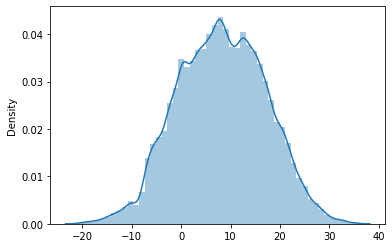

In [11]:
sns.distplot(d[['T (degC)']])

Feature Selection using correlation

In [ ]:
#correlation matrix

corrmat = d.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [14]:
new_d=d[['Date Time','T (degC)','Tpot (K)','Tdew (degC)', 'VPmax (mbar)','VPact (mbar)','VPdef (mbar)','sh (g/kg)','H2OC (mmol/mol)','rho (g/m**3)','rh (%)']]

Extracted features

In [15]:
new_d

,Date Time,T (degC),Tpot (K),Tdew (degC),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),rh (%)
0,2010-01-01 00:10:00,-2.84,272.89,-3.41,4.95,4.75,0.21,3.06,4.91,1244.56,95.8
1,2010-01-01 00:20:00,-2.85,272.88,-3.43,4.95,4.74,0.21,3.05,4.90,1244.48,95.7
2,2010-01-01 00:30:00,-2.88,272.85,-3.46,4.94,4.73,0.21,3.05,4.89,1244.65,95.8
3,2010-01-01 00:40:00,-2.90,272.84,-3.47,4.93,4.72,0.21,3.04,4.88,1244.57,95.8
4,2010-01-01 00:50:00,-2.96,272.78,-3.53,4.91,4.70,0.21,3.03,4.86,1244.81,95.8
...,...,...,...,...,...,...,...,...,...,...,...
176970,2013-12-05 23:10:00,6.83,280.69,2.97,9.91,7.56,2.35,4.76,7.63,1229.78,76.3
176971,2013-12-05 23:20:00,6.76,280.62,2.91,9.86,7.53,2.33,4.74,7.60,1230.05,76.4
176972,2013-12-05 23:30:00,6.68,280.54,2.74,9.81,7.44,2.36,4.68,7.51,1230.43,75.9
176973,2013-12-05 23:40:00,6.69,280.56,2.70,9.82,7.42,2.40,4.67,7.49,1230.36,75.6


Data Cleaning - Removal of outliers using Z-score

In [16]:
#Using z_scores to remove outliers


cols = ['T (degC)','Tpot (K)','Tdew (degC)','VPmax (mbar)','VPact (mbar)','VPdef (mbar)','sh (g/kg)','H2OC (mmol/mol)','rho (g/m**3)','rh (%)']


def z_score(new_d):
    new_d.columns = [x + "_zscore" for x in new_d.columns.tolist()]
    return ((new_d - new_d.mean())/new_d.std(ddof=0))

In [17]:
z_scores = z_score(new_d[cols])
z_scores['ID'] = z_scores.index
z_scores

,T (degC)_zscore,Tpot (K)_zscore,Tdew (degC)_zscore,VPmax (mbar)_zscore,VPact (mbar)_zscore,VPdef (mbar)_zscore,sh (g/kg)_zscore,H2OC (mmol/mol)_zscore,rho (g/m**3)_zscore,rh (%)_zscore,ID
0,-1.245397,-1.046821,-0.989706,-1.016398,-0.988487,-0.764432,-0.961412,-0.962316,0.545702,1.195997,0
1,-1.246524,-1.047934,-0.992481,-1.016398,-0.990886,-0.764432,-0.965187,-0.964682,0.543824,1.189994,1
2,-1.249903,-1.051275,-0.996644,-1.017709,-0.993284,-0.764432,-0.965187,-0.967049,0.547816,1.195997,2
3,-1.252157,-1.052389,-0.998032,-1.019020,-0.995682,-0.764432,-0.968963,-0.969415,0.545937,1.195997,3
4,-1.258916,-1.059071,-1.006357,-1.021643,-1.000479,-0.764432,-0.972738,-0.974148,0.551573,1.195997,4
...,...,...,...,...,...,...,...,...,...,...,...
176970,-0.156044,-0.178169,-0.104413,-0.365989,-0.314573,-0.312441,-0.319588,-0.318606,0.198613,0.025544,176970
176971,-0.163930,-0.185965,-0.112738,-0.372546,-0.321767,-0.316665,-0.327139,-0.325705,0.204953,0.031547,176971
176972,-0.172942,-0.194874,-0.136328,-0.379102,-0.343352,-0.310329,-0.349792,-0.347005,0.213877,0.001535,176972
176973,-0.171816,-0.192647,-0.141878,-0.377791,-0.348148,-0.301881,-0.353567,-0.351738,0.212233,-0.016472,176973


In [18]:
new_d['ID'] = new_d.index
new_d = pd.merge(new_d, z_scores)
new_d

<ipython-input-18-2079301573e8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_d['ID'] = new_d.index


,Date Time,T (degC),Tpot (K),Tdew (degC),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),...,T (degC)_zscore,Tpot (K)_zscore,Tdew (degC)_zscore,VPmax (mbar)_zscore,VPact (mbar)_zscore,VPdef (mbar)_zscore,sh (g/kg)_zscore,H2OC (mmol/mol)_zscore,rho (g/m**3)_zscore,rh (%)_zscore
0,2010-01-01 00:10:00,-2.84,272.89,-3.41,4.95,4.75,0.21,3.06,4.91,1244.56,...,-1.245397,-1.046821,-0.989706,-1.016398,-0.988487,-0.764432,-0.961412,-0.962316,0.545702,1.195997
1,2010-01-01 00:20:00,-2.85,272.88,-3.43,4.95,4.74,0.21,3.05,4.90,1244.48,...,-1.246524,-1.047934,-0.992481,-1.016398,-0.990886,-0.764432,-0.965187,-0.964682,0.543824,1.189994
2,2010-01-01 00:30:00,-2.88,272.85,-3.46,4.94,4.73,0.21,3.05,4.89,1244.65,...,-1.249903,-1.051275,-0.996644,-1.017709,-0.993284,-0.764432,-0.965187,-0.967049,0.547816,1.195997
3,2010-01-01 00:40:00,-2.90,272.84,-3.47,4.93,4.72,0.21,3.04,4.88,1244.57,...,-1.252157,-1.052389,-0.998032,-1.019020,-0.995682,-0.764432,-0.968963,-0.969415,0.545937,1.195997
4,2010-01-01 00:50:00,-2.96,272.78,-3.53,4.91,4.70,0.21,3.03,4.86,1244.81,...,-1.258916,-1.059071,-1.006357,-1.021643,-1.000479,-0.764432,-0.972738,-0.974148,0.551573,1.195997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178026,2013-12-05 23:10:00,6.83,280.69,2.97,9.91,7.56,2.35,4.76,7.63,1229.78,...,-0.156044,-0.178169,-0.104413,-0.365989,-0.314573,-0.312441,-0.319588,-0.318606,0.198613,0.025544
178027,2013-12-05 23:20:00,6.76,280.62,2.91,9.86,7.53,2.33,4.74,7.60,1230.05,...,-0.163930,-0.185965,-0.112738,-0.372546,-0.321767,-0.316665,-0.327139,-0.325705,0.204953,0.031547
178028,2013-12-05 23:30:00,6.68,280.54,2.74,9.81,7.44,2.36,4.68,7.51,1230.43,...,-0.172942,-0.194874,-0.136328,-0.379102,-0.343352,-0.310329,-0.349792,-0.347005,0.213877,0.001535
178029,2013-12-05 23:40:00,6.69,280.56,2.70,9.82,7.42,2.40,4.67,7.49,1230.36,...,-0.171816,-0.192647,-0.141878,-0.377791,-0.348148,-0.301881,-0.353567,-0.351738,0.212233,-0.016472


In [19]:
new_d = new_d.loc[new_d['T (degC)'].abs()>=3]
new_d = new_d.loc[new_d['Tpot (K)'].abs()>=3]
new_d = new_d.loc[new_d['Tdew (degC)'].abs()>=3]
new_d = new_d.loc[new_d['VPmax (mbar)'].abs()>=3]
new_d = new_d.loc[new_d['VPact (mbar)'].abs()>=3]
new_d = new_d.loc[new_d['VPdef (mbar)'].abs()>=3]
new_d = new_d.loc[new_d['sh (g/kg)'].abs()>=3]
new_d = new_d.loc[new_d['H2OC (mmol/mol)'].abs()>=3]
new_d = new_d.loc[new_d['rho (g/m**3)'].abs()>=3]
new_d = new_d.loc[new_d['rh (%)'].abs()>=3]
new_d = new_d.drop(columns =['T (degC)_zscore','Tpot (K)_zscore','Tdew (degC)_zscore','VPmax (mbar)_zscore','VPact (mbar)_zscore','VPdef (mbar)_zscore','sh (g/kg)_zscore','H2OC (mmol/mol)_zscore','rho (g/m**3)_zscore','rh (%)_zscore','ID'])
new_d.reset_index(drop=True, inplace=True)
new_d

,Date Time,T (degC),Tpot (K),Tdew (degC),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),rh (%)
0,2010-01-03 16:00:00,5.91,280.57,-3.14,9.30,4.84,4.46,3.07,4.93,1222.87,52.06
1,2010-01-03 16:10:00,5.83,280.48,-3.01,9.25,4.89,4.36,3.10,4.98,1223.29,52.87
2,2010-01-04 09:00:00,5.93,280.54,-3.06,9.31,4.87,4.44,3.09,4.96,1223.44,52.34
3,2010-01-04 09:10:00,5.83,280.42,-3.07,9.25,4.87,4.38,3.09,4.95,1224.17,52.64
4,2010-01-04 11:30:00,7.08,281.57,-3.44,10.08,4.73,5.35,3.00,4.81,1220.46,46.96
...,...,...,...,...,...,...,...,...,...,...,...
54945,2013-12-05 18:10:00,10.57,284.66,3.46,12.77,7.83,4.94,4.94,7.92,1210.18,61.32
54946,2013-12-05 18:20:00,11.35,285.44,3.67,13.45,7.95,5.50,5.02,8.04,1206.91,59.10
54947,2013-12-05 18:30:00,11.69,285.77,3.26,13.76,7.72,6.04,4.87,7.81,1205.62,56.12
54948,2013-12-05 19:40:00,9.32,283.34,3.07,11.74,7.62,4.12,4.80,7.70,1216.67,64.88


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


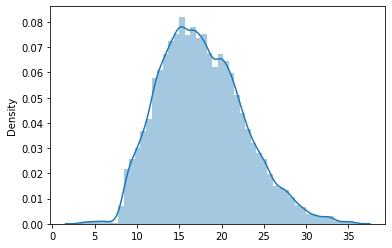

In [20]:
sns.distplot(new_d[['T (degC)']])

Skewness is reduced in the distribution

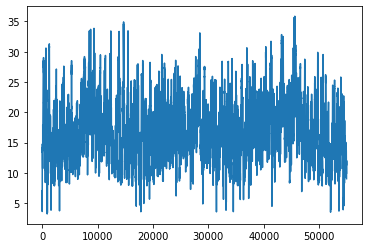

In [21]:
plt.plot(new_d[['T (degC)']])

In [22]:
new_d .set_index('Date Time',drop=True,inplace=True) 


In [23]:
new_d

,T (degC),Tpot (K),Tdew (degC),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),rh (%)
Date Time,,,,,,,,,,
2010-01-03 16:00:00,5.91,280.57,-3.14,9.30,4.84,4.46,3.07,4.93,1222.87,52.06
2010-01-03 16:10:00,5.83,280.48,-3.01,9.25,4.89,4.36,3.10,4.98,1223.29,52.87
2010-01-04 09:00:00,5.93,280.54,-3.06,9.31,4.87,4.44,3.09,4.96,1223.44,52.34
2010-01-04 09:10:00,5.83,280.42,-3.07,9.25,4.87,4.38,3.09,4.95,1224.17,52.64
2010-01-04 11:30:00,7.08,281.57,-3.44,10.08,4.73,5.35,3.00,4.81,1220.46,46.96
...,...,...,...,...,...,...,...,...,...,...
2013-12-05 18:10:00,10.57,284.66,3.46,12.77,7.83,4.94,4.94,7.92,1210.18,61.32
2013-12-05 18:20:00,11.35,285.44,3.67,13.45,7.95,5.50,5.02,8.04,1206.91,59.10
2013-12-05 18:30:00,11.69,285.77,3.26,13.76,7.72,6.04,4.87,7.81,1205.62,56.12


In [24]:
target=new_d[['T (degC)']]
new_d.drop(['T (degC)'], axis=1)

,Tpot (K),Tdew (degC),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),rh (%)
Date Time,,,,,,,,,
2010-01-03 16:00:00,280.57,-3.14,9.30,4.84,4.46,3.07,4.93,1222.87,52.06
2010-01-03 16:10:00,280.48,-3.01,9.25,4.89,4.36,3.10,4.98,1223.29,52.87
2010-01-04 09:00:00,280.54,-3.06,9.31,4.87,4.44,3.09,4.96,1223.44,52.34
2010-01-04 09:10:00,280.42,-3.07,9.25,4.87,4.38,3.09,4.95,1224.17,52.64
2010-01-04 11:30:00,281.57,-3.44,10.08,4.73,5.35,3.00,4.81,1220.46,46.96
...,...,...,...,...,...,...,...,...,...
2013-12-05 18:10:00,284.66,3.46,12.77,7.83,4.94,4.94,7.92,1210.18,61.32
2013-12-05 18:20:00,285.44,3.67,13.45,7.95,5.50,5.02,8.04,1206.91,59.10
2013-12-05 18:30:00,285.77,3.26,13.76,7.72,6.04,4.87,7.81,1205.62,56.12


Data Transformation using MinMaxScaler

In [25]:
from sklearn.preprocessing import MinMaxScaler
Ms = MinMaxScaler()
new_d [new_d.columns] = Ms.fit_transform(new_d)

Train-Test split

In [26]:
training_size = round(len(new_d) * 0.80)

In [27]:
train_data = new_d [:training_size]
target_train = target [:training_size]
target_test = target [training_size:]
test_data  = new_d [training_size:]

#### Prediction with XGBoost

In [28]:
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(train_data, target_train,)

[14:01:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(n_estimators=1000)

In [29]:
xgbpredictions = pd.DataFrame(reg.predict(test_data))
xgbpredictions=xgbpredictions[[0]]
index=target_test.index.copy()
a=pd.DataFrame(index)
xgbpredictions=pd.concat([a, xgbpredictions], axis=1, ignore_index=True)
xgbpredictions.rename(columns = {0:'Date Time', 1:'T (degC)' }, inplace = True)
xgbpredictions .set_index('Date Time',drop=True,inplace=True) 


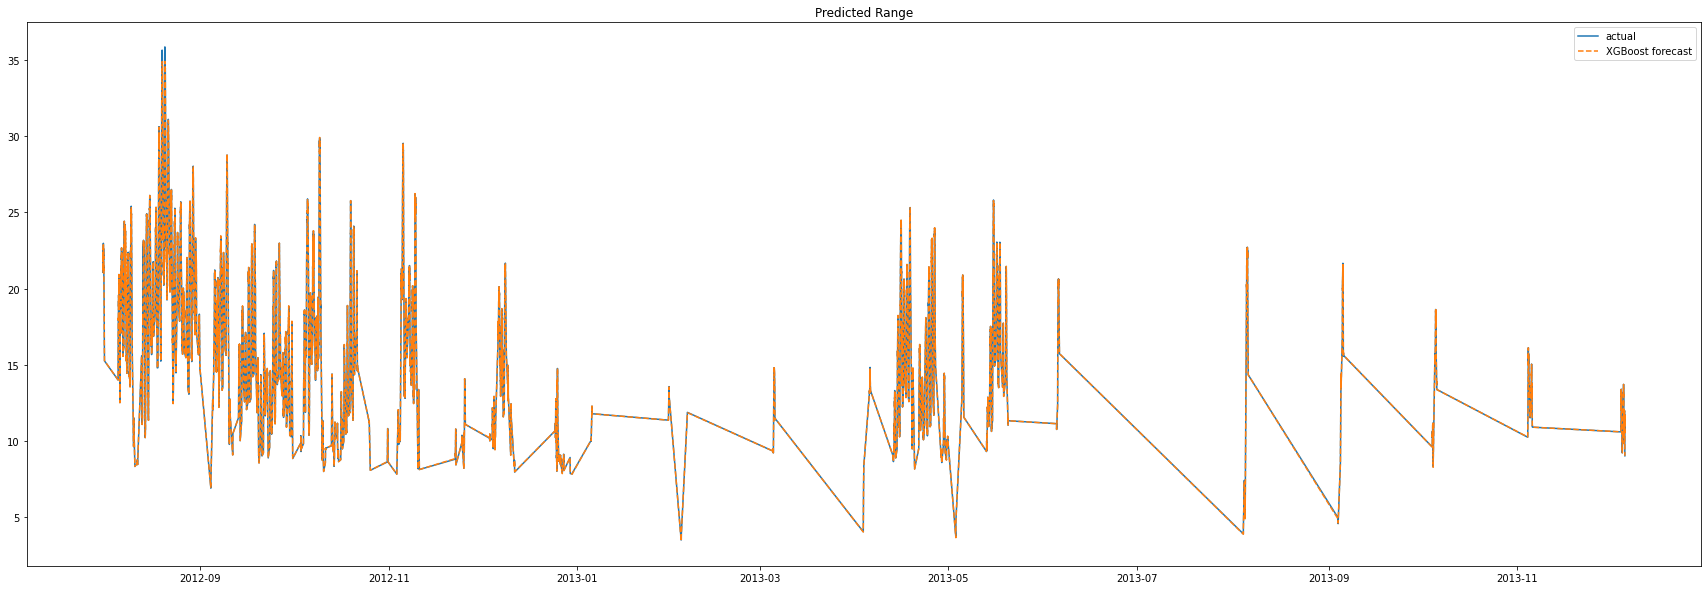

In [30]:
plt.figure(figsize=(30, 10))
plt.plot(target_test, label='actual')
plt.plot(xgbpredictions, linestyle='dashed', label='XGBoost forecast')
plt.title('Predicted Range')
plt.legend()
plt.show()

##### Performance Evaluation

In [31]:
rmse_xgboost=mean_squared_error(y_true=target_test,
                   y_pred=xgbpredictions)
rmse_xgboost

0.0012336014251933315

In [32]:
mae_xgboost=mean_absolute_error(y_true=target_test,
                   y_pred=xgbpredictions)
mae_xgboost

0.01240431236808576

##### Random Forest Regressor

In [33]:
model = RandomForestRegressor()
model.fit(train_data, target_train)
# make a one-step prediction
yhat = model.predict(test_data)

<ipython-input-33-ba969874cd79>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(train_data, target_train)


In [34]:
yhat = pd.DataFrame(yhat)
index=target_test.index.copy()
a=pd.DataFrame(index)
yhat=pd.concat([a, yhat], axis=1, ignore_index=True)
yhat.rename(columns = {0:'Date Time', 1:'T (degC)' }, inplace = True)
yhat .set_index('Date Time',drop=True,inplace=True) 


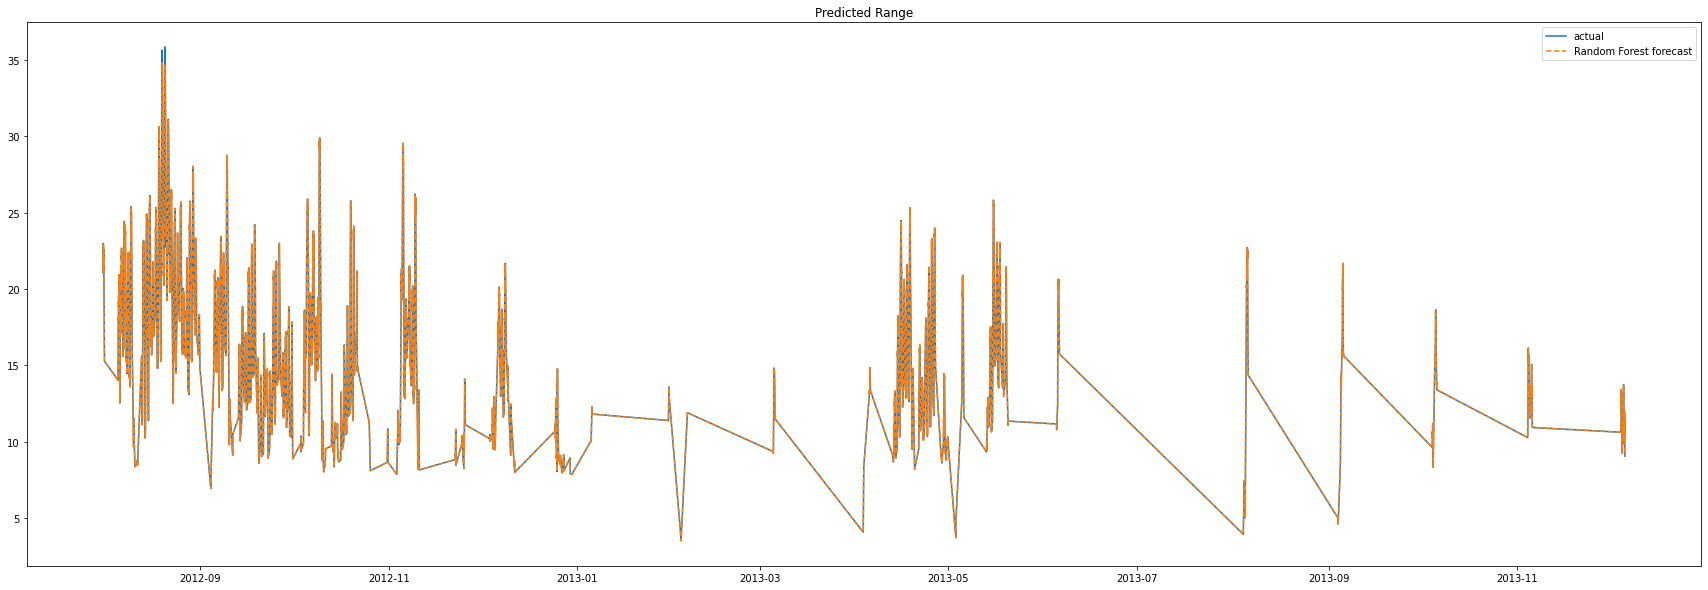

In [35]:
plt.figure(figsize=(30, 10))
plt.plot(target_test, label='actual')
plt.plot(yhat, linestyle='dashed', label='Random Forest forecast')
plt.title('Predicted Range')
plt.legend()
plt.show()

##### Performance Evaluation

In [36]:
rmse_rf=mean_squared_error(y_true=target_test,
                   y_pred=yhat)
rmse_rf

0.0018656386706095373

In [37]:
mae_rf=mean_absolute_error(y_true=target_test,
                   y_pred=yhat)
mae_rf

0.0030144949954689785

LSTM Model

In [38]:
train_data, test_data = np.array(train_data), np.array(test_data)
train_data = np.reshape(train_data, (train_data.shape[0], train_data.shape[1], 1))

In [39]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional

In [40]:
model = Sequential()
model.add(LSTM(units=10, return_sequences=True, input_shape = (train_data.shape[1],1)))

model.add(Dropout(0.1)) 
model.add(LSTM(units=10))

model.add(Dense(2))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 10)            480       
                                                                 
 dropout (Dropout)           (None, 10, 10)            0         
                                                                 
 lstm_1 (LSTM)               (None, 10)                840       
                                                                 
 dense (Dense)               (None, 2)                 22        
                                                                 
Total params: 1,342
Trainable params: 1,342
Non-trainable params: 0
_________________________________________________________________


In [41]:
history=model.fit(train_data, target_train, epochs=30,validation_data=(test_data, target_test), verbose=1)

Epoch 1/30
1374/1374 [==============================] - 21s 12ms/step - loss: 102.2623 - mean_absolute_error: 8.3224 - val_loss: 31.0859 - val_mean_absolute_error: 4.3542
Epoch 2/30
1374/1374 [==============================] - 15s 11ms/step - loss: 26.0325 - mean_absolute_error: 4.0509 - val_loss: 26.1374 - val_mean_absolute_error: 4.1542
Epoch 3/30
1374/1374 [==============================] - 15s 11ms/step - loss: 11.1115 - mean_absolute_error: 2.2405 - val_loss: 3.4602 - val_mean_absolute_error: 1.0334
Epoch 4/30
1374/1374 [==============================] - 16s 11ms/step - loss: 2.1237 - mean_absolute_error: 0.9007 - val_loss: 1.1832 - val_mean_absolute_error: 0.5225
Epoch 5/30
1374/1374 [==============================] - 15s 11ms/step - loss: 0.6923 - mean_absolute_error: 0.5058 - val_loss: 0.5160 - val_mean_absolute_error: 0.3064
Epoch 6/30
1374/1374 [==============================] - 15s 11ms/step - loss: 0.2814 - mean_absolute_error: 0.3306 - val_loss: 0.2672 - val_mean_absolute_

In [42]:
test_predicted = model.predict(test_data)

344/344 [==============================] - 2s 3ms/step


In [43]:
predicted=pd.DataFrame(test_predicted)
predicted=predicted[[0]]
index=target_test.index.copy()
a=pd.DataFrame(index)
predicted=pd.concat([a, predicted], axis=1, ignore_index=True)
predicted.rename(columns = {0:'Date Time', 1:'T (degC)' }, inplace = True)
predicted .set_index('Date Time',drop=True,inplace=True) 

In [44]:
predicted

,T (degC)
Date Time,
2012-07-31 12:40:00,21.370407
2012-07-31 12:50:00,20.987114
2012-07-31 13:00:00,21.130474
2012-07-31 13:10:00,21.882217
2012-07-31 13:20:00,21.745903
...,...
2013-12-05 18:10:00,10.382812
2013-12-05 18:20:00,11.182012
2013-12-05 18:30:00,11.523181


In [45]:
predictions=pd.concat([target_test,predicted], axis=1, ignore_index=True)
predictions.rename(columns = {0:'Actual Temperature (degC)', 1:'Predicted Temperature (degC)' }, inplace = True)

Actual vs Predictions

In [46]:
predictions

,Actual Temperature (degC),Predicted Temperature (degC)
Date Time,,
2012-07-31 12:40:00,21.44,21.370407
2012-07-31 12:50:00,21.06,20.987114
2012-07-31 13:00:00,21.20,21.130474
2012-07-31 13:10:00,21.94,21.882217
2012-07-31 13:20:00,21.81,21.745903
...,...,...
2013-12-05 18:10:00,10.57,10.382812
2013-12-05 18:20:00,11.35,11.182012
2013-12-05 18:30:00,11.69,11.523181


In [47]:
before=target_train
actual=before.append(target_test)
after=target_train
pred=after.append(predicted)

##### Performance Evaluation

In [48]:
rmse_lstm = mean_squared_error(y_true=target_test,
                   y_pred=predicted)
rmse_lstm

0.0249773078841322

In [49]:
mae_lstm = mean_absolute_error(y_true=target_test,
                   y_pred=predicted)
mae_lstm

0.09809694939596857

LSTM model has least error as compared to RandomForest and XGBoost for Weather Forecasting and hence LSTM model is the better option amongst RandomForest and XGBoost

Weather Forecast vs Actual

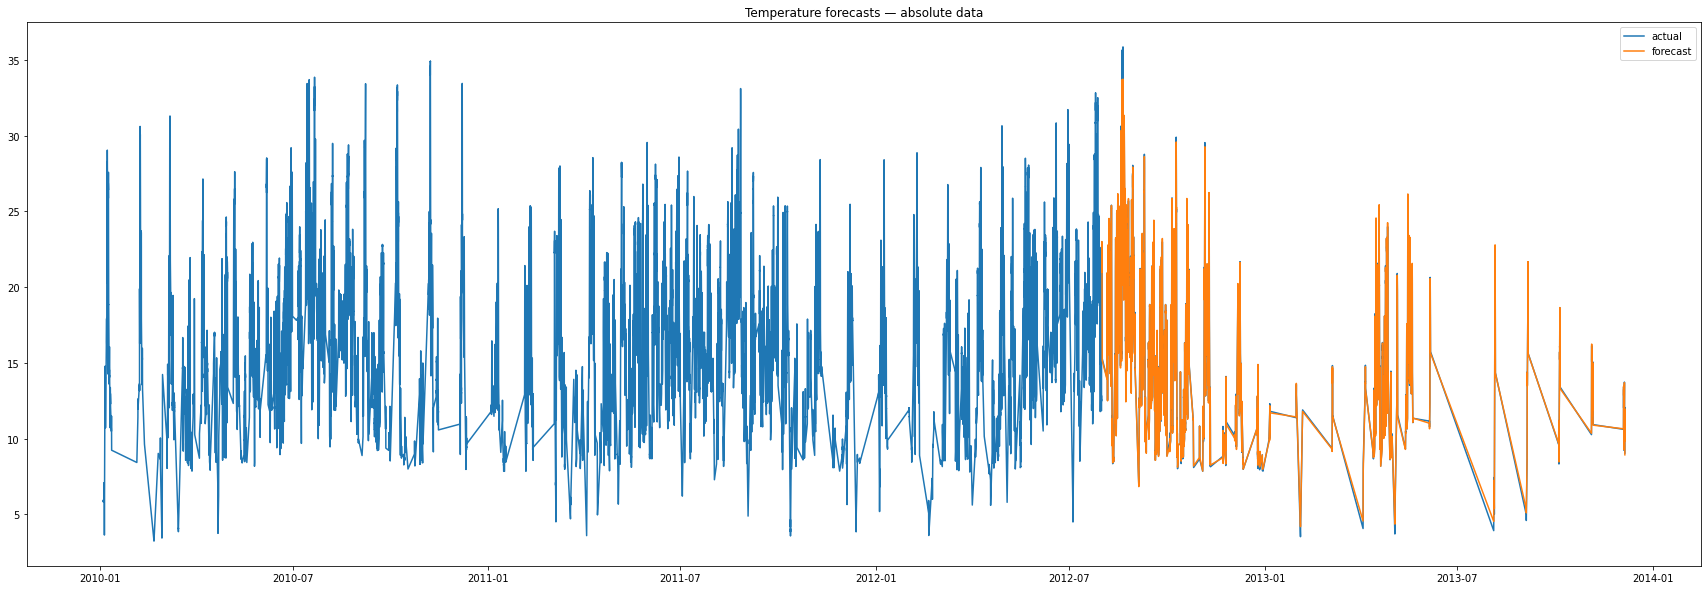

In [50]:
plt.figure(figsize=(30, 10))
plt.plot(actual, label='actual')
plt.plot(predicted, label='forecast')
plt.title('Temperature forecasts — absolute data')
plt.legend()
plt.show()

Inspecting the Predicted Range

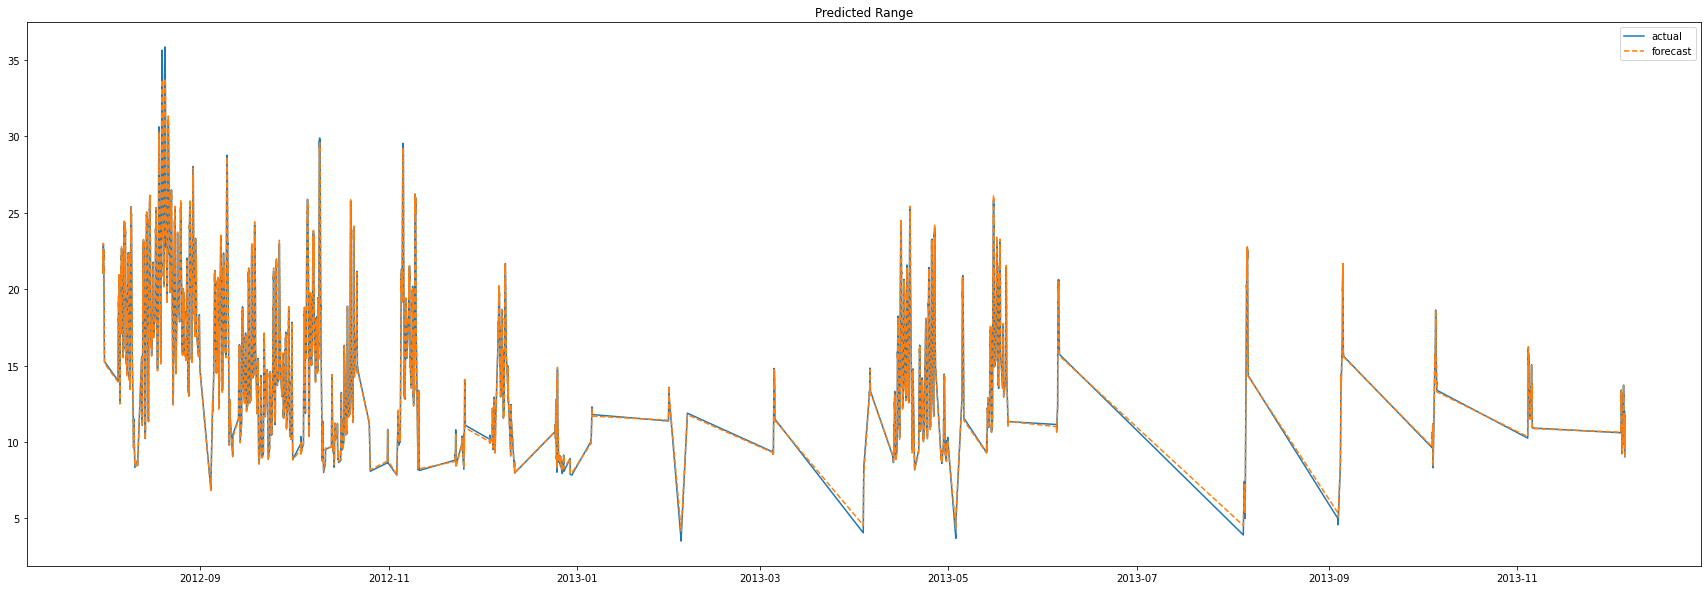

In [51]:
plt.figure(figsize=(30, 10))
plt.plot(target_test, label='actual')
plt.plot(predicted, linestyle='dashed', label='forecast')
plt.title('Predicted Range')
plt.legend()
plt.show()

Inspecting some random small chunks

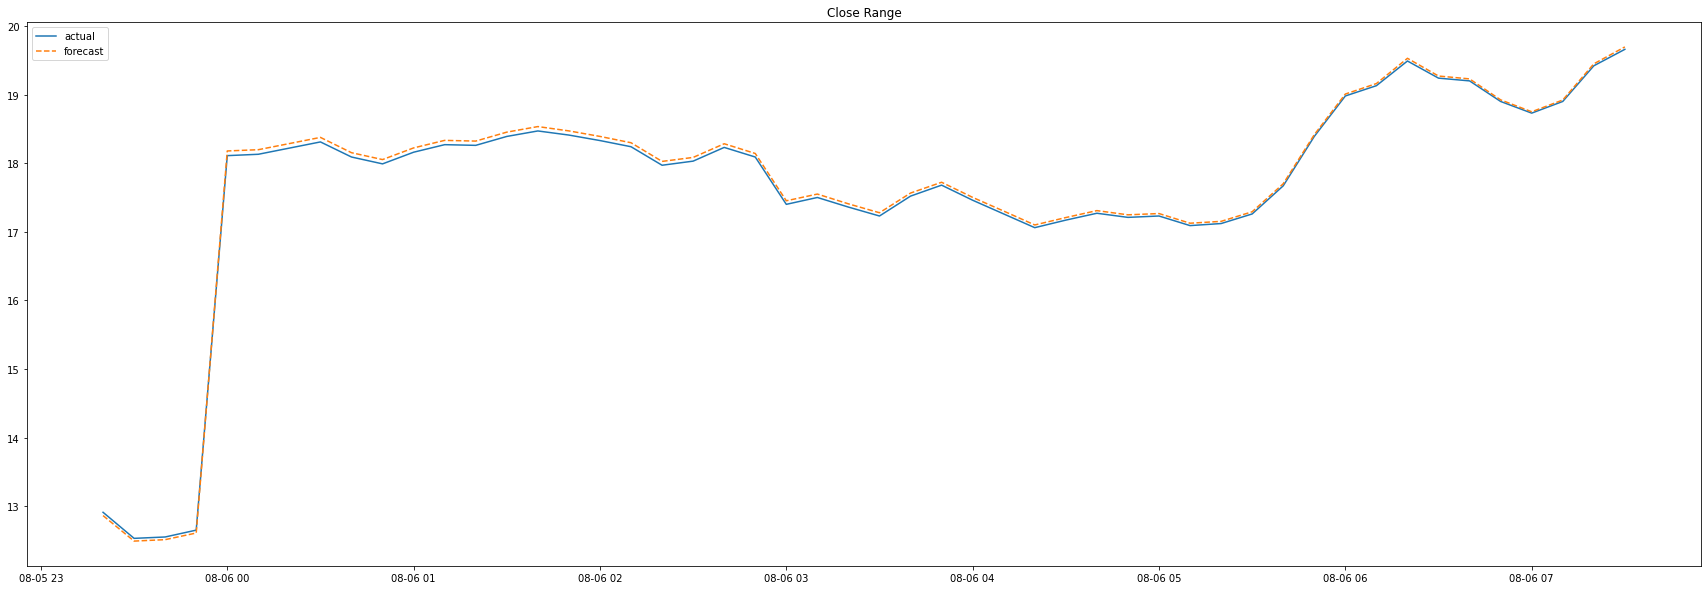

In [52]:
plt.figure(figsize=(30, 10))
plt.plot(target_test[150:200], label='actual')
plt.plot(predicted[150:200], linestyle='dashed', label='forecast')
plt.title('Close Range')
plt.legend()
plt.show()

The two lines are very close to each other, they basically overlap. 

#### Performance Comparison between the models

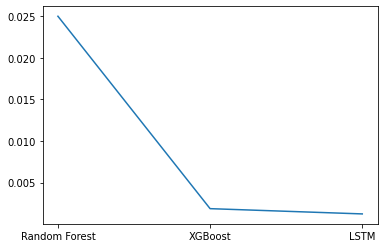

In [53]:
rmse = [rmse_lstm, rmse_rf, rmse_xgboost]
x=np.array(rmse)
plt.plot(['Random Forest', 'XGBoost', 'LSTM'], x)

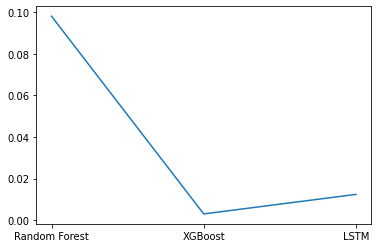

In [55]:
mae = [mae_lstm, mae_rf, mae_xgboost]
x=np.array(mae)
plt.plot(['Random Forest', 'XGBoost', 'LSTM'], x)